In [1]:
%run ../MLHCExperiment-Common-Val17Test18.ipynb
import statsmodels.api as sm

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = read_data()

In [3]:
def run_dynamic_TS(name, features, label):
    print(name)
    endog = data[label]
    feats = data[features]
    feats = feats.replace([np.inf, -np.inf, np.nan], 0)
    exog = sm.add_constant(feats)
    nobs = endog.shape[0]
    
    mod = sm.tsa.statespace.SARIMAX(endog.loc[TRAIN_START:TRAIN_END],
                                    exog=exog.loc[TRAIN_START:TRAIN_END],
                                    order=(7,0,1), seasonal=(0, 0, 0, 1))
    fit_res = mod.fit(disp=False, maxiter=200, method='powell')
    #print(fit_res.summary())
    #print(fit_res.mle_retvals)
    
    mod = sm.tsa.statespace.SARIMAX(endog, exog=exog, order=(7,0,1), seasonal=(0, 0, 0, 1))
    res = mod.filter(fit_res.params)
    
    predict_dy = res.get_prediction(dynamic='2018-01-01')
    
    fig, ax = plt.subplots(figsize=(15,7))
    ax.set(title=name, xlabel='Date', ylabel='Sick Visits Per FTE')
    data.loc[TEST_START:, label].plot(ax=ax, color='gray', style='.', label='actual sick visits/fte')
    predict_dy.predicted_mean.loc[TEST_START:].plot(ax=ax, color='r', style='.', label='predicted sick visits/fte')
    
    # delete the 0.0 entry from our calculations
    actual = np.delete(np.array(data.loc[TEST_START:, label].values), 65)
    pred_dy_osh = np.delete(np.array(predict_dy.predicted_mean[TEST_START:].values), 65)

    print("DY Mean squared error: %.3f" % (mean_squared_error(pred_dy_osh, actual)))
    print("DY Root mean squared error: %.3f\n" % (np.sqrt(mean_squared_error(pred_dy_osh, actual))))
    
    return pred_dy_osh

Dynamic TS, with no lag, all visits
DY Mean squared error: 1.727
DY Root mean squared error: 1.314

Dynamic TS, with no lag, resp visits
DY Mean squared error: 0.505
DY Root mean squared error: 0.710

Dynamic TS, with no lag, non resp visits
DY Mean squared error: 0.941
DY Root mean squared error: 0.970



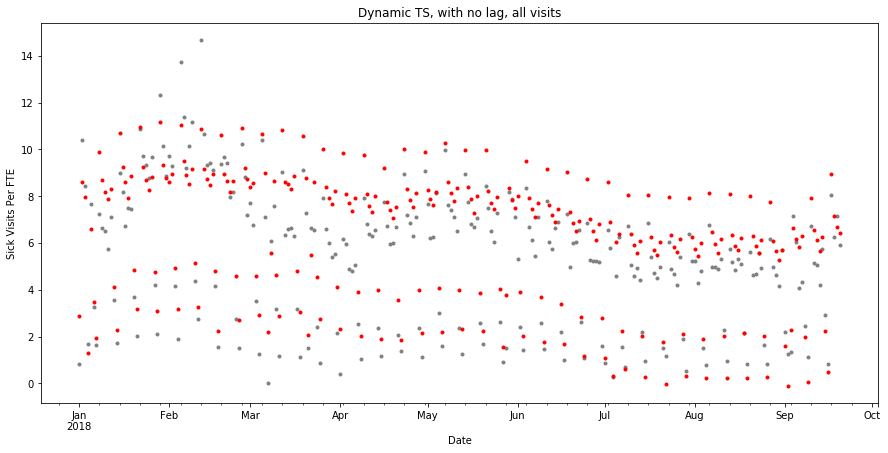

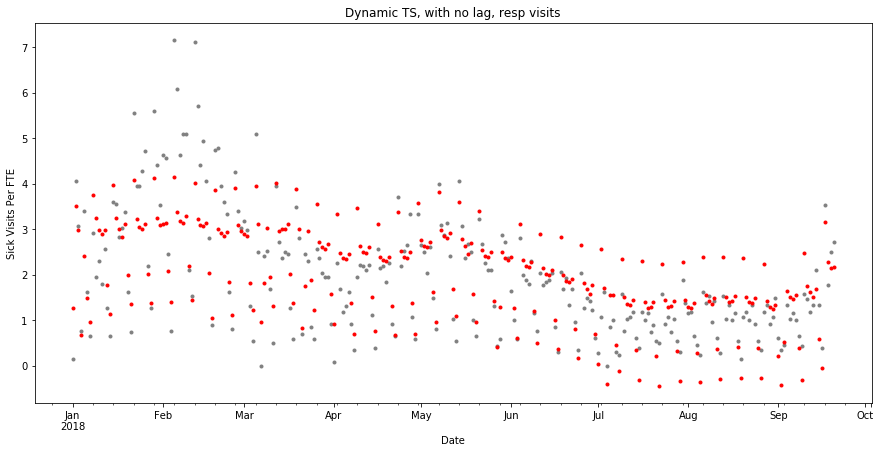

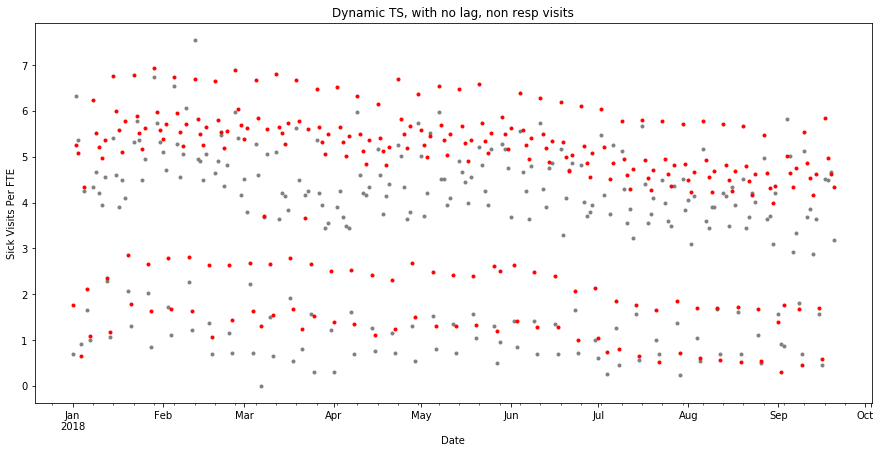

In [4]:
pred_all = run_dynamic_TS("Dynamic TS, with no lag, all visits", BASE_FEATURES, ALL_VISITS_LABEL)
pred_r = run_dynamic_TS("Dynamic TS, with no lag, resp visits", BASE_FEATURES, ICD8_LABEL)
pred_nr = run_dynamic_TS("Dynamic TS, with no lag, non resp visits", BASE_FEATURES, ICD8OPP_LABEL)

In [5]:
print(pred_all)

[ 2.86126248e+00  8.61508639e+00  7.96120076e+00  1.31129402e+00
  6.58970143e+00  3.49545625e+00  1.92916659e+00  9.90489482e+00
  8.68871919e+00  8.17511346e+00  7.89160328e+00  8.32147530e+00
  4.11500885e+00  2.26793090e+00  1.07093737e+01  9.23425212e+00
  8.60432383e+00  7.93179178e+00  8.84498614e+00  4.83459955e+00
  3.16897782e+00  1.09643947e+01  9.23365743e+00  8.67723462e+00
  8.24780763e+00  8.80094623e+00  4.74065645e+00  3.10353294e+00
  1.11877099e+01  9.32291707e+00  8.75518703e+00  8.60074566e+00
  8.96667864e+00  4.93740018e+00  3.16887286e+00  1.10410182e+01
  9.48420433e+00  8.88358975e+00  8.53492234e+00  9.14412974e+00
  5.14239528e+00  3.25652663e+00  1.08886101e+01  9.17829037e+00
  8.72982275e+00  8.48534454e+00  8.95264779e+00  4.80853735e+00
  2.23403695e+00  1.06104812e+01  8.95018341e+00  8.63690884e+00
  8.19721038e+00  8.63230772e+00  4.60431534e+00  2.68985531e+00
  1.08957705e+01  9.21815193e+00  8.74993802e+00  8.39855810e+00
  8.56345186e+00  4.56678

In [6]:
print(pred_r)

[ 1.25876572  3.51457857  2.97508318  0.67768218  2.40116651  1.49443306
  0.95211443  3.74925257  3.24612676  2.98744451  2.89658374  2.9750884
  1.77189227  1.14248673  3.9755511   3.24976024  3.01267912  2.83606803
  3.10776794  1.98768485  1.35652624  4.07549927  3.21857327  3.05344989
  3.00822075  3.12293622  2.00663339  1.36805015  4.12435754  3.23668188
  3.08215089  3.10576177  3.13500291  2.07186327  1.39249194  4.14658802
  3.37491435  3.17820905  3.1377504   3.28841805  2.19095496  1.44339397
  4.02447605  3.22740707  3.09664161  3.06617634  3.12820941  2.03361971
  1.03660202  3.85256532  2.9959755   2.90874261  2.85040301  2.93539966
  1.84596359  1.11294525  3.91434328  3.09195249  2.95645652  2.89944157
  2.84667727  1.81289466  1.21924396  3.94011682  3.11559875  1.80784252
  3.03425671  1.94220617  1.30024354  4.01950634  2.94980822  3.00033074
  3.00670019  3.11514193  2.01920173  1.37293818  3.87703157  3.00805577
  0.83316094  1.75725109  2.97077674  1.87309192  1.

In [7]:
print(pred_nr)

[1.75525545 5.2498166  5.08345828 0.65183524 4.34818591 2.11788779
 1.07951466 6.24395663 5.51837417 5.22150572 4.97984996 5.36485203
 2.35283146 1.18477724 6.76197764 6.00660114 5.58539879 5.10289221
 5.7693289  2.84682909 1.78641528 6.78306587 5.89927311 5.51224165
 5.16016847 5.62034608 2.65941926 1.62642514 6.92706333 5.97824704
 5.58224737 5.39452795 5.72514905 2.7950249  1.68516902 6.73649712
 5.96121606 5.54399386 5.23700463 5.71255934 2.80353162 1.62574389
 6.69769457 5.8284478  5.49817242 5.25827536 5.65691785 2.64839384
 1.05806403 6.64621336 5.80751474 5.5390214  5.18246279 5.57270824
 2.63899786 1.44653217 6.89194386 6.04389196 5.69606429 5.39716725
 5.62492739 2.68100977 1.62447255 6.67379627 5.85328576 3.70597723
 5.59833555 2.65673764 1.55455627 6.80594605 5.64439242 5.52361113
 5.28820905 5.73667359 2.78305141 1.67419276 6.68290436 5.77800739
 1.24371942 3.67383128 5.6101247  2.65439805 1.52041359 6.468784
 5.64909285 5.33077364 5.06679538 5.4999488  2.50841152 1.384122